In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Tujuan Analisis
- **mengelompokkan pelanggan** berdasarkan kesamaan karakteristik mereka, sehingga perusahaan bisa **menawarkan promosi produk yang tepat** sesuai dengan kebutuhan dan preferensi masing-masing kelompok pelanggan. 

In [142]:
# Load dataset 
df = pd.read_csv('C:/KULIAH/SEMESTER 3/Machine Learning/UAS/DATASET/2A.tsv', sep='\t')
df.head()

,Customer ID,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,1969/03/05,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,2005/07/01,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,1974/12/01,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,2003/11/21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,1979/09/13,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [143]:
# A). Exploratory Data Anaylysis
# 1. Check Data type, missing values, dan distribution data 
eda_summary = {
    "Data Types": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Unique Values": df.nunique()
}

# Statistik deskriptif untuk kolom numerik
numeric_summary = df.describe()

eda_summary, numeric_summary

({'Data Types': Customer ID                   int64
  Birth Date                   object
  Gender                       object
  Item Purchased               object
  Category                     object
  Purchase Amount (USD)         int64
  Location                     object
  Size                         object
  Color                        object
  Season                       object
  Review Rating               float64
  Subscription Status          object
  Payment Method               object
  Shipping Type                object
  Discount Applied             object
  Promo Code Used              object
  Previous Purchases            int64
  Preferred Payment Method     object
  Frequency of Purchases       object
  dtype: object,
  'Missing Values': Customer ID                 0
  Birth Date                  0
  Gender                      0
  Item Purchased              0
  Category                    0
  Purchase Amount (USD)       0
  Location                    0
  Siz

## Data Types
#### **Categorical Variables (Variabel Kategorikal)**:

1. **Birth Date**: Tanggal lahir pelanggan. 
   
2. **Gender**:Jenis kelamin pelanggan, misalnya "Laki-laki", "Perempuan". 

3. **Item Purchased**: Nama atau jenis barang yang dibeli oleh pelanggan. 

4. **Category**: Kategori produk yang dibeli, misalnya pakaian, elektronik, dll. 

5. **Location**: Lokasi atau kota tempat pelanggan berada. 

6. **Size**: Ukuran produk yang dibeli, seperti "S", "M", "L". 

7. **Color**: Warna produk yang dibeli

8. **Season**:Musim atau waktu pembelian, seperti musim panas atau musim dingin. 

9. **Subscription Status**: Status langganan pelanggan, apakah pelanggan berlangganan layanan atau tidak. 

10. **Payment Method**: Metode pembayaran yang digunakan pelanggan, seperti kartu kredit, PayPal, dll. 

11. **Shipping Type**:Jenis pengiriman yang digunakan pelanggan untuk pengiriman produk, seperti pengiriman standar atau ekspres. 

12. **Discount Applied**:Menunjukkan apakah diskon diterapkan pada pembelian pelanggan. Ini memberikan informasi tentang apakah pelanggan menerima potongan harga.

13. **Promo Code Used**:Menunjukkan apakah pelanggan menggunakan kode promo untuk mendapatkan diskon. 

14. **Preferred Payment Method**:Metode pembayaran yang lebih disukai oleh pelanggan, seperti kartu kredit atau transfer bank. 

15. **Frequency of Purchases**:Frekuensi pembelian yang dilakukan pelanggan, seperti pembelian bulanan atau tahunan. 

### **Numerical Variables (Variabel Numerik)**:
1. **Customer ID**:ID unik pelanggan yang digunakan untuk mengidentifikasi setiap pelanggan dalam dataset. Ini adalah identifikasi numerik.

2. **Purchase Amount (USD)**:Jumlah uang yang dibelanjakan pelanggan dalam satu transaksi, diukur dalam USD. Ini menunjukkan nilai pembelian.

3. **Review Rating**:Rating yang diberikan oleh pelanggan terhadap produk yang dibeli, biasanya dalam rentang 1-5. Ini mengukur kepuasan pelanggan terhadap produk.

4. **Previous Purchases**:Jumlah pembelian sebelumnya yang dilakukan oleh pelanggan. Ini menggambarkan seberapa sering pelanggan melakukan pembelian di masa lalu.

## Missing Values:
- Tidak ada nilai yang hilang dalam dataset. Semua kolom memiliki data lengkap, yaitu 0 missing values untuk setiap kolom.

## Statictic Summary:
1. Customer ID:
- Jumlah: 3900
- Rentang: 1 hingga 3900

2. Purchase Amount (USD):
- Rata-rata: 59.76 USD
- Rentang: 20 hingga 100 USD
- Kuartil 1: 39 USD, Kuartil 3: 81 USD

3. Review Rating:
- Rata-rata: 3.75
- Rentang: 2.5 hingga 5.0
- Kuartil 1: 3.1, Kuartil 3: 4.4

4. Previous Purchases:
- Rata-rata: 25.35
- Rentang: 1 hingga 50
- Kuartil 1: 13, Kuartil 3: 38

In [159]:
# 1. Check inconsistent in categorical variables
for col in df.columns:
    print(f"Nilai unik dalam kolom '{col}':")
    print(df[col].unique())
    print("\n")

# 2.Check duplicate data
print("Checking for duplicate rows:")
print(df.duplicated().sum())  

Nilai unik dalam kolom 'Customer ID':
[   1    2    3 ... 3898 3899 3900]


Nilai unik dalam kolom 'Birth Date':
<DatetimeArray>
['1969-03-05 00:00:00', '2005-07-01 00:00:00', '1974-12-01 00:00:00',
 '2003-11-21 00:00:00', '1979-09-13 00:00:00', '1978-02-11 00:00:00',
 '1961-09-11 00:00:00', '1997-12-18 00:00:00', '1998-01-11 00:00:00',
 '1967-04-16 00:00:00',
 ...
 '1984-06-11 00:00:00', '1979-12-06 00:00:00', '1989-04-25 00:00:00',
 '1988-03-08 00:00:00', '2003-02-11 00:00:00', '1958-01-22 00:00:00',
 '1984-02-23 00:00:00', '1972-02-11 00:00:00', '1978-05-02 00:00:00',
 '1980-03-30 00:00:00']
Length: 3534, dtype: datetime64[ns]


Nilai unik dalam kolom 'Gender':
[1 0]


Nilai unik dalam kolom 'Item Purchased':
[ 2  9 11 14 20 16 18  4  7 17  5 19 22 13 10 12 15  8 21  0  1  3  6]


Nilai unik dalam kolom 'Category':
[1 2 3 0]


Nilai unik dalam kolom 'Purchase Amount (USD)':
[-0.28562864  0.17885219  0.55888195  1.27671595 -0.45453076 -1.67907111
  1.06558831 -1.0879137   1.57229466 

### 1. **Inconsistent Values**
- **`Gender`**: Terdapat 2 nilai yang merepresentasikan jenis kelamin (0 untuk Female, 1 untuk Male). Distribusinya terlihat tidak merata, di mana mayoritas adalah Male.
- **`Item Purchased`** dan **`Category`**: Kedua kolom ini berisi data kategori yang cukup bervariasi dan sesuai dengan konteks e-commerce pakaian.
- **`Location`**: Distribusi lokasi menunjukkan pelanggan berasal dari banyak wilayah berbeda.
- **`Size`** dan **`Color`**: Distribusi ini tampak normal untuk industri pakaian.

### 2. **Outliers**
- **`Purchase Amount (USD)`**: Nilai minimum dan maksimum yang signifikan menunjukkan variasi besar dalam jumlah pembelian. Ini mencerminkan pelanggan dengan pengeluaran yang sangat tinggi atau sangat rendah.
- **Kolom lain seperti `Review Rating` dan `Previous Purchases`**: Tidak ditemukan outlier, menunjukkan distribusi data yang konsisten.

### 3. **Distribusi Kategori**
Sebagian besar kolom seperti **`Season`, `Subscription Status`, `Payment Method`**, dan lainnya memiliki distribusi yang mencerminkan pola perilaku pelanggan.
- **`Subscription Status`**: Mayoritas pelanggan tidak berlangganan, sehingga promosi khusus dapat diarahkan untuk menarik pelanggan non-subscriber.
- **`Payment Method`**: Mayoritas menggunakan metode pembayaran tertentu (seperti Credit Card), tetapi ada variasi metode lain yang bisa menjadi fokus promosi.

### 4. **Outliers yang Terkait `Purchase Amount (USD)`**
Kolom ini menunjukkan adanya transaksi dengan nilai yang sangat tinggi (maksimum 1.698971). Transaksi ini mungkin disebabkan oleh pembelian barang premium atau pembelian dalam jumlah besar.

### 5. **Check for Duplicates**
Tidak ditemukan duplikasi baris pada dataset. 

In [145]:
# Fix inconsistent data 
# 1. Gender 
df['Gender'] = df['Gender'].replace({'f': 'Female', 'M': 'Male'})

# 2. Item Purchased
item_mapping = {
    'T-shirt': 'Shirt',  
    'Sweater': 'Hoodie',  
    'Backpack': 'Bag',    
    'Gloves': 'Glove'     
}
df['Item Purchased'] = df['Item Purchased'].replace(item_mapping)

# 3. Frequency of Purchases
frequency_mapping = {
    'Fortnightly': 'Bi-Weekly',  
    'Every 3 Months': 'Quarterly' 
}
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace(frequency_mapping)

# 4. Payment Method
payment_mapping = {
    'PayPal': 'Digital Payment',
    'Venmo': 'Digital Payment',
}
df['Payment Method'] = df['Payment Method'].replace(payment_mapping)

# 5. Preffered Payment Method
preferred_payment_mapping = {
    'Paypal': 'Digital Payment',
    'Venmo': 'Digital Payment',
}
df['Preferred Payment Method'] = df['Preferred Payment Method'].replace(preferred_payment_mapping)

1. *Gender*:
- 'f' diubah menjadi 'Female'.
- 'M' diubah menjadi 'Male'.

2. *Item Purchased*:
- menyamakan arti yang sama
- 'T-shirt' dan 'Shirt' disamakan menjadi 'Shirt'.
- 'Sweater' dan 'Hoodie' disamakan menjadi 'Hoodie'.
- 'Backpack' menjadi 'Bag', dan 'Gloves' menjadi 'Glove'.

3. *Frequency of Purchase*
- menyamakan istilah seperti nilai lainnya
- 'Fortnightly' diubah menjadi 'Bi-Weekly'.
- 'Every 3 Months' diubah menjadi 'Quarterly'.

4. *Payment Method dan Preferred Payment Method*
- mengelompokkan metode pembayaran berbasis digital (seperti - 'PayPal' dan 'Venmo') menjadi kategori umum 'Digital Payment'.

In [146]:
# Change data type
df['Birth Date'] = pd.to_datetime(df['Birth Date'], errors='coerce')
# Extract new variable from Birth Date
df['Age'] = (pd.to_datetime('today') - df['Birth Date']).dt.days // 365

Numeric Columns for Distribution: ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


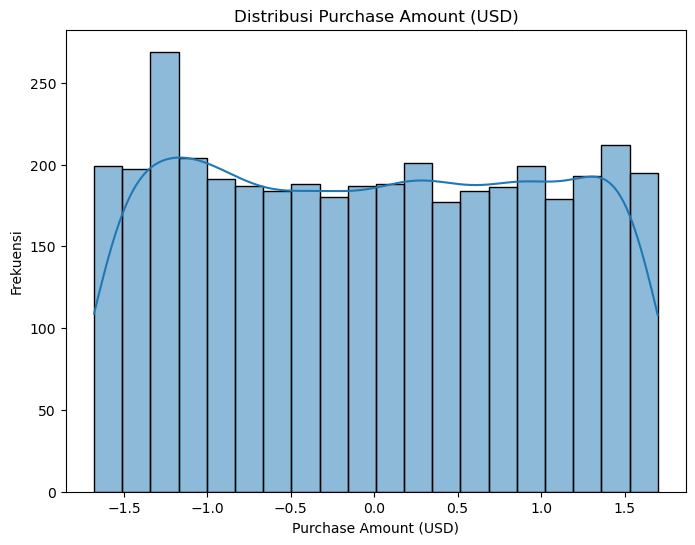

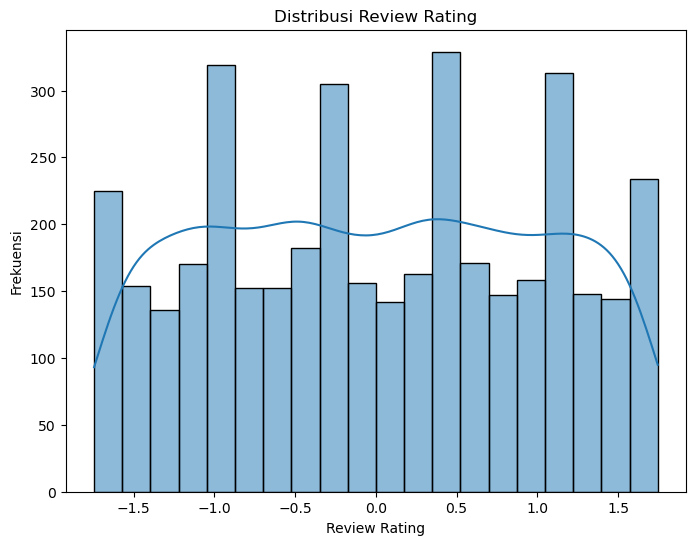

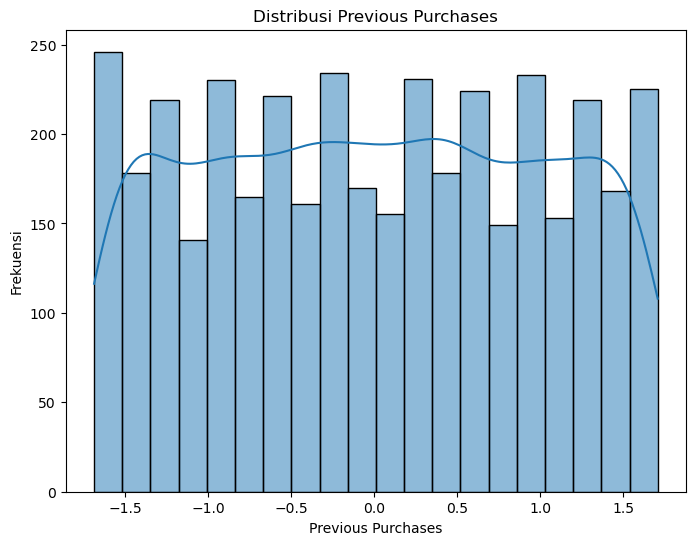

In [161]:
# Distribution data for numerical variables
numeric_columns = ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
print("Numeric Columns for Distribution:", numeric_columns)
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()  

### **1. Distribusi Purchase Amount (USD):**
- Jumlah pembelian tersebar merata dengan puncak kecil pada nilai sekitar 30 dan 90.

### **2. Distribusi Review Rating:**
- Sebagian besar ulasan berada pada kisaran 3.0 hingga 5.0, dengan puncak terlihat pada sekitar 3.0 dan 4.0.

### **3. Distribusi Previous Purchases:**
- Sebaran jumlah pembelian sebelumnya cukup merata di seluruh rentang data.

Categorical Columns for Frequency: ['Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


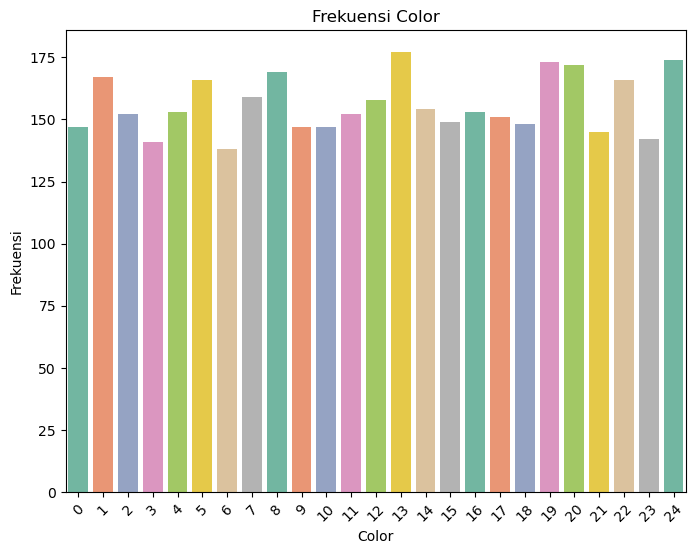

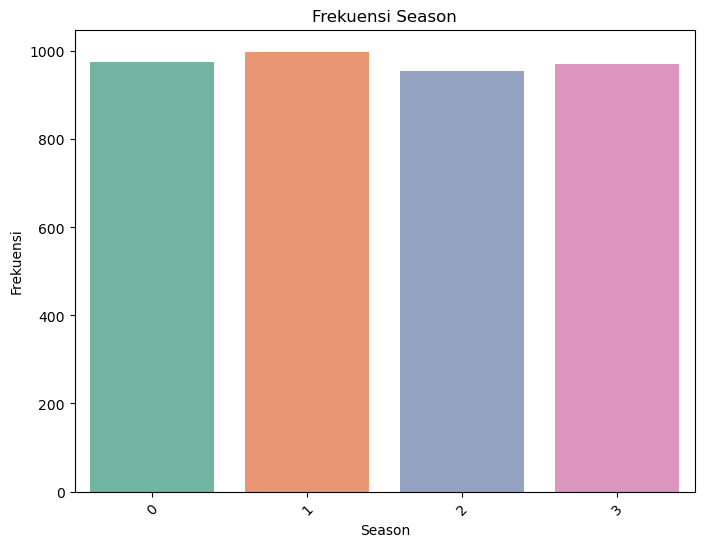

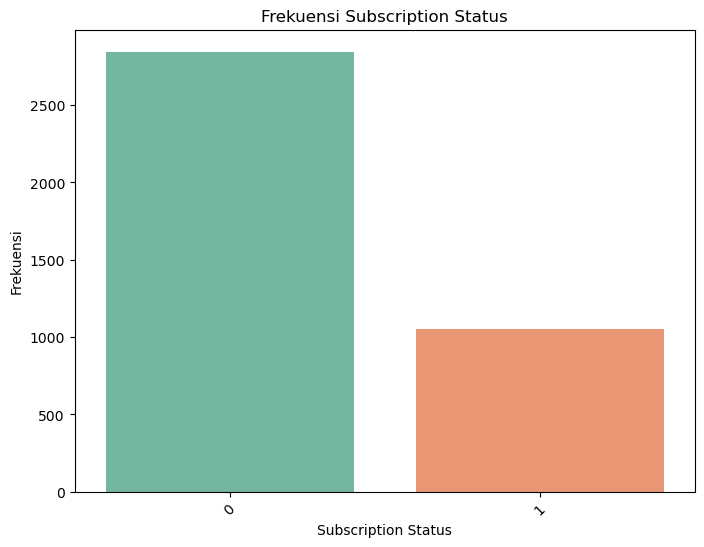

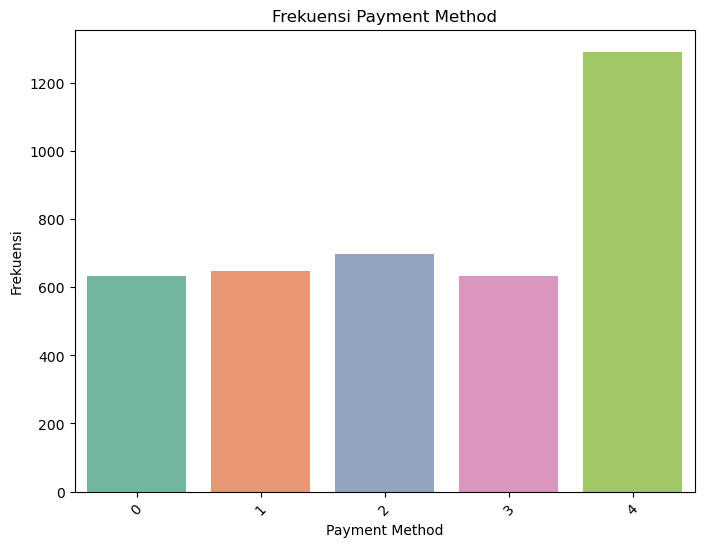

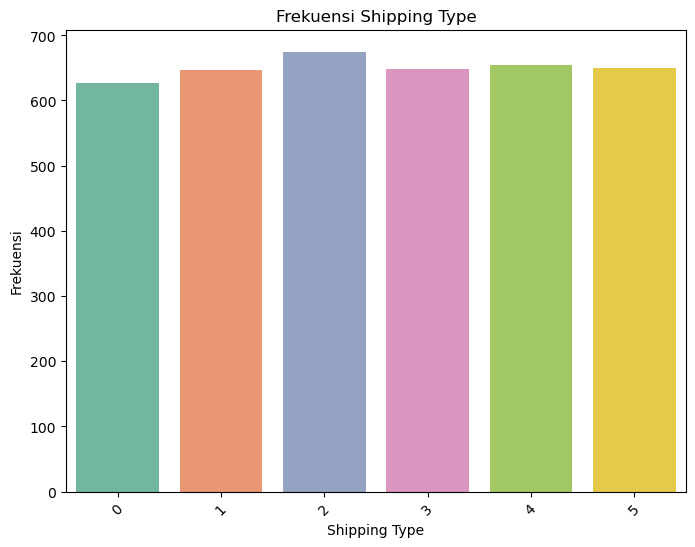

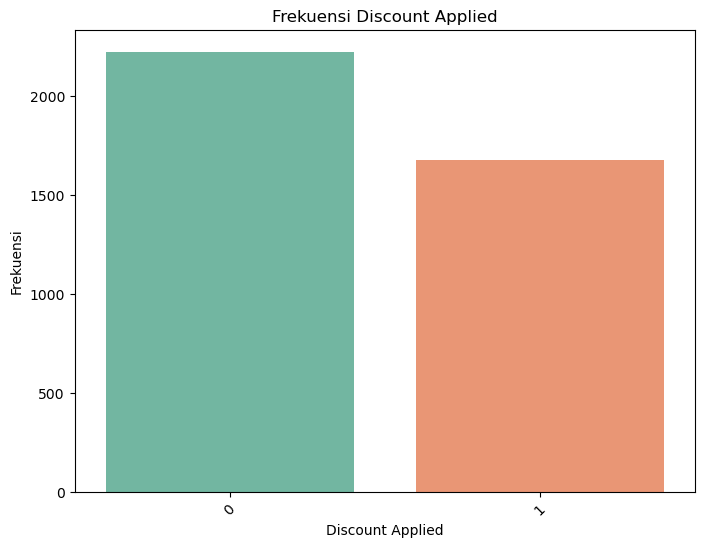

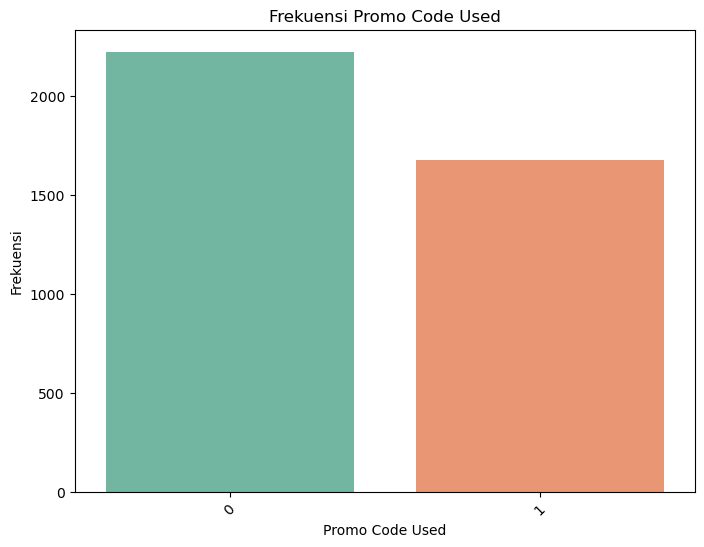

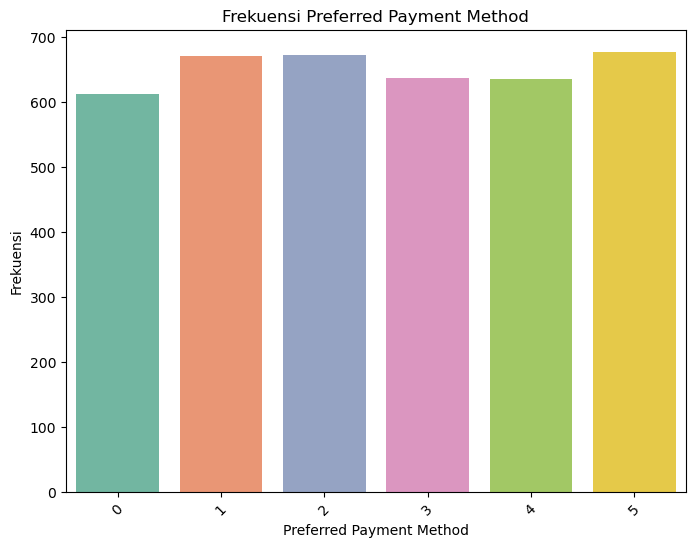

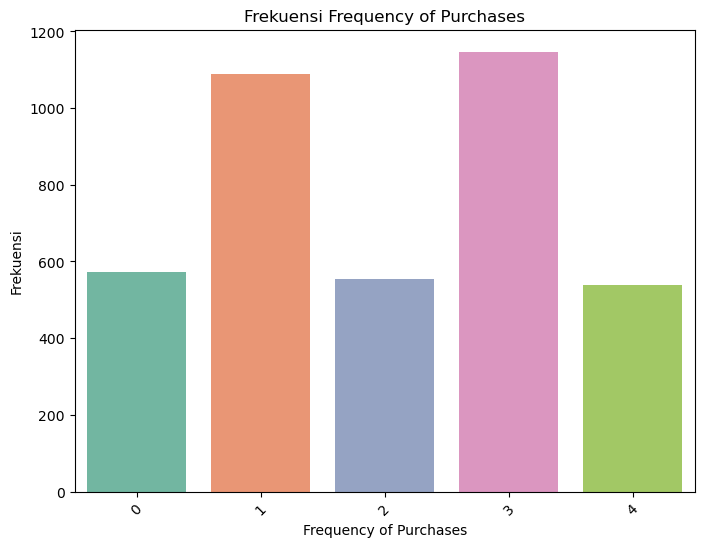

In [160]:
# Frekuensi Nilai Kategorical
categorical_columns = ['Color', 'Season', 'Subscription Status', 'Payment Method', 
                       'Shipping Type', 'Discount Applied', 'Promo Code Used', 
                       'Preferred Payment Method', 'Frequency of Purchases']

print("Categorical Columns for Frequency:", categorical_columns)
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[column], palette='Set2')
    plt.title(f'Frekuensi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)  
    plt.show()  

Columns used for Correlation Matrix: ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


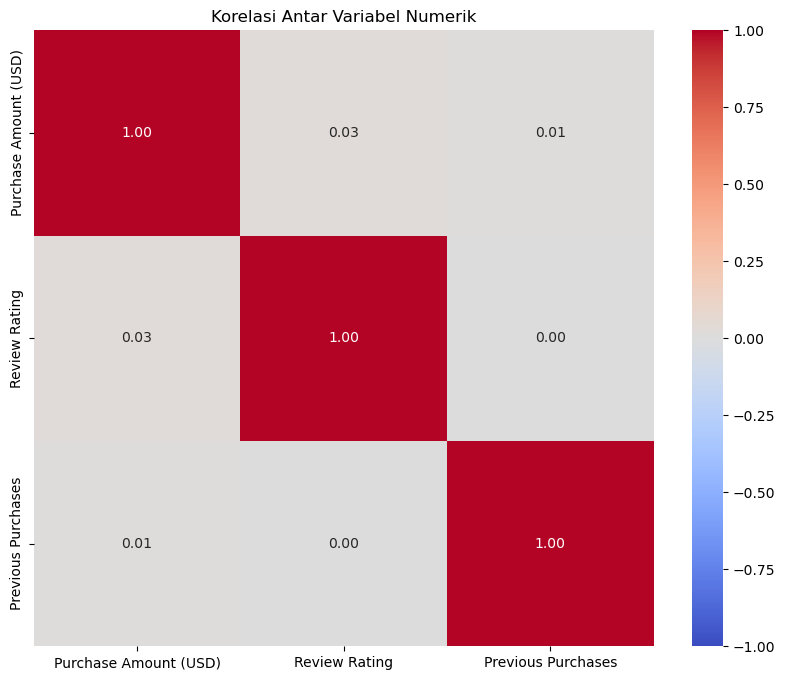

In [162]:
# Analisis Korelasi untuk Kolom Numerik
correlation_matrix = df[numeric_columns].corr()  
print("Columns used for Correlation Matrix:", numeric_columns)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

## **Corellation Matrix**
  - Hubungan antar variabel numerik seperti `Purchase Amount (USD)`, `Review Rating`, dan `Previous Purchases` memiliki korelasi yang sangat rendah.
  - Korelasi tertinggi hanya 0.03 antara `Purchase Amount (USD)` dan `Review Rating`, yang menunjukkan hampir tidak ada hubungan linear.

In [148]:
# Encode categorical variables
label_encoders = {}
categorical_columns = [
    "Gender", "Item Purchased", "Category", "Location", "Size", "Color", 
    "Season", "Subscription Status", "Payment Method", "Shipping Type", 
    "Discount Applied", "Promo Code Used", "Preferred Payment Method", 
    "Frequency of Purchases"  
]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Standardize numerical variables for clustering
scaler = StandardScaler()
numerical_columns = ["Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,Customer ID,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age
0,1,1969-03-05,1,2,1,-0.285629,16,0,7,3,-0.907584,1,2,1,1,1,-0.785831,4,1,55
1,2,2005-07-01,1,9,1,0.178852,18,0,12,3,-0.907584,1,0,1,1,1,-1.616552,1,1,19
2,3,1974-12-01,1,11,1,0.558882,20,2,12,1,-0.907584,1,1,2,1,1,-0.162789,2,4,50
3,4,2003-11-21,1,14,2,1.276716,38,1,12,1,-0.349027,1,4,3,1,1,1.637107,5,4,21
4,5,1979-09-13,1,2,1,-0.454531,36,1,21,1,-1.466141,1,1,2,1,1,0.391025,5,0,45


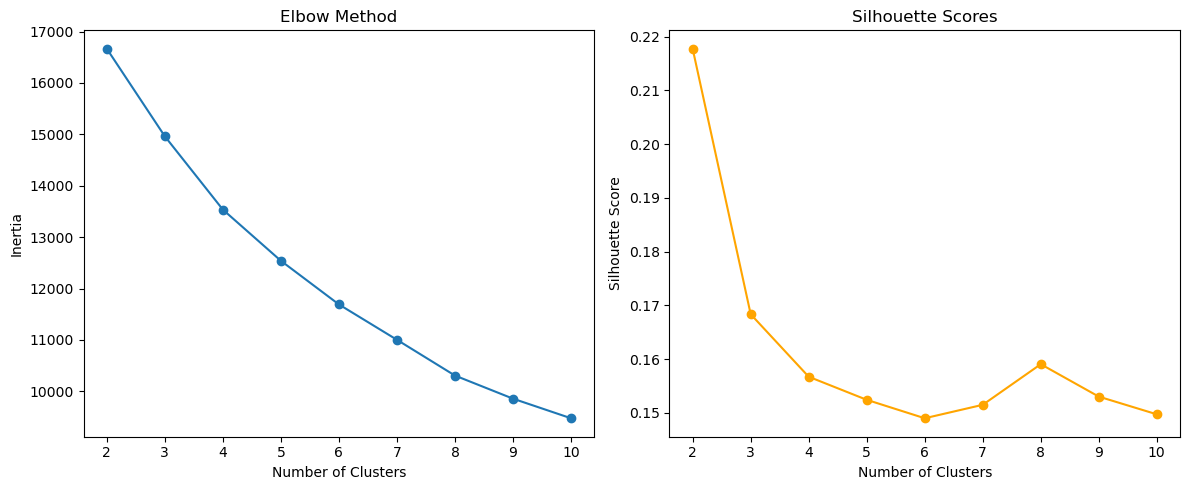

In [154]:
# B). Training K-Means
# Select relevant features for clustering
features = ['Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases', 'Preferred Payment Method', 'Subscription Status', 'Review Rating']
X = df[features]

# Convert categorical variables to numerical (if necessary)
X = pd.get_dummies(X, columns=['Preferred Payment Method', 'Subscription Status'], drop_first=True)

# Determine the optimal number of clusters using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow and Silhouette Score
plt.figure(figsize=(12, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

1. **Elbow Method**:  
   - Titik "tekukan" grafik Elbow Method terlihat pada **k = 3**. Ini menunjukkan pengurangan inertia mulai melambat setelah 3 klaster, sehingga 3 mungkin adalah pilihan optimal.

2. **Silhouette Score**:  
   - Silhouette Score tertinggi berada di **k = 2**, tetapi nilai **k = 3** juga memiliki skor yang cukup baik dan lebih stabil dibandingkan nilai lebih tinggi.

In [155]:
# Train K-Means Model with Optimal Clusters
k_optimal = 3  
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans_optimal.fit(X)
df['Cluster'] = kmeans_optimal.labels_

Cluster Analysis:
         Customer ID                    Birth Date    Gender  Item Purchased  \
Cluster                                                                        
0        1955.387522 1980-09-11 03:53:14.001199744  0.676665       11.061788   
1        1939.483786 1980-02-18 02:07:28.028045568  0.694128       11.189308   
2        1954.549451 1980-05-06 05:50:46.153846144  0.670330       11.226190   

         Category  Purchase Amount (USD)   Location      Size      Color  \
Cluster                                                                    
0        1.001200               0.009722  24.401920  1.144571  12.191962   
1        1.042068              -0.845515  24.123576  1.092901  12.272568   
2        0.960623               0.868613  24.208791  1.110806  11.813187   

           Season  Review Rating  Subscription Status  Payment Method  \
Cluster                                                                 
0        1.485903      -0.018064             0.271746 

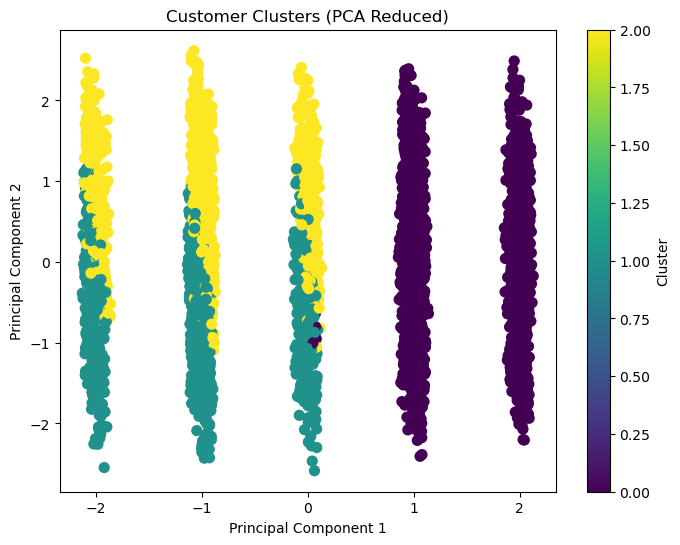

In [156]:
# C). Analyze Cluster Characteristics
cluster_analysis = df.groupby('Cluster').mean()
print("Cluster Analysis:")
print(cluster_analysis)
cluster_analysis.to_csv("cluster_analysis.csv", index=True)

# Visualize Clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50)
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### **Cluster 0**
- **Karakteristik:**
  - **`Purchase Amount (USD)`:** Rata-rata jumlah pembelian mendekati netral (0.009722), menunjukkan pelanggan di klaster ini memiliki pola pembelian yang stabil tanpa banyak pembelian ekstrem.
  - **`Review Rating`:** Ulasan cenderung mendekati netral (-0.018064), menunjukkan pengalaman pelanggan rata-rata.
  - **`Subscription Status`:** Sekitar **27% pelanggan** di klaster ini adalah pelanggan berlangganan.
  - **`Frequency of Purchases`:** Rata-rata pembelian **cukup rendah (0.66)** dibandingkan klaster lain.
  - **`Age`:** Rata-rata usia pelanggan sekitar **43.88 tahun**.

### **Cluster 1**
- **Karakteristik:**
  - **`Purchase Amount (USD)`:** Rata-rata jumlah pembelian **lebih rendah (-0.845515)**, menunjukkan pelanggan cenderung melakukan pembelian bernilai rendah.
  - **`Review Rating`:** Ulasan sedikit negatif (-0.151622), menunjukkan pengalaman pelanggan yang kurang memuaskan.
  - **`Subscription Status`:** Sekitar **26% pelanggan** di klaster ini adalah pelanggan berlangganan, sedikit lebih rendah dibanding klaster lain.
  - **`Frequency of Purchases`:** Rata-rata pembelian **tertinggi (3.01)** dibandingkan klaster lain.
  - **`Age`:** Rata-rata usia pelanggan sekitar **44.44 tahun**.

### **Cluster 2**
- **Karakteristik:**
  - **`Purchase Amount (USD)`:** Rata-rata jumlah pembelian **lebih tinggi (0.868613)**, menunjukkan pelanggan di klaster ini cenderung membeli dalam jumlah besar.
  - **`Review Rating`:** Ulasan cenderung lebih positif (0.186002) dibanding klaster lainnya.
  - **`Subscription Status`:** Sekitar **28% pelanggan** di klaster ini adalah pelanggan berlangganan.
  - **`Frequency of Purchases`:** Rata-rata pembelian **cukup tinggi (2.98)**, hampir setara dengan klaster 1.
  - **`Age`:** Rata-rata usia pelanggan sekitar **44.22 tahun**.

### **Perbandingan Utama Antar Klaster**
1. **Klaster 0:**
   - Pembelian dan ulasan stabil, tetapi frekuensi pembelian rendah.
   - Usia pelanggan sedikit lebih muda dibandingkan klaster lain.

- Solusi: 
- Tawarkan Diskon & Promo: Tingkatkan keterlibatan pelanggan dengan diskon musiman atau poin loyalitas.
- Rekomendasi Personal: Kirimkan saran produk berdasarkan pembelian sebelumnya untuk mendorong pembelian lebih sering.

2. **Klaster 1:**
   - Pembelian bernilai rendah dengan ulasan yang cenderung negatif, tetapi memiliki frekuensi pembelian tertinggi.
   - Usia pelanggan paling tinggi dibandingkan klaster lain.

- Solusi:
- Tingkatkan Nilai Transaksi: Tawarkan bundling produk atau diskon untuk pembelian besar.
- Perbaiki Kepuasan: Tangani keluhan pelanggan dengan survei, perbaikan kualitas, dan layanan pelanggan cepat.

3. **Klaster 2:**
   - Pembelian bernilai tinggi dengan ulasan yang lebih positif, serta frekuensi pembelian yang cukup tinggi.
   - Pelanggan lebih terlibat secara finansial dan memberikan ulasan positif.
   
- Solusi:
- Produk Premium: Promosikan produk eksklusif atau edisi terbatas.
- Apresiasi Loyalitas: Berikan diskon eksklusif atau hadiah untuk menjaga loyalitas pelanggan.

## Grafik
- Klaster 0 (ungu) terlihat lebih terpisah dibandingkan klaster lainnya.
- Klaster 1 (kuning) dan klaster 2 (hijau kebiruan) memiliki tumpang tindih, menunjukkan karakteristik yang mungkin serupa pada beberapa pelanggan di dua klaster tersebut.

## Rekomendasi Umum
1. **Data-Driven Marketing:**
   - Gunakan data analitik untuk memprediksi kebutuhan pelanggan dan menawarkan promosi yang relevan.
2. **Optimalkan Pengalaman Belanja:**
   - Pastikan antarmuka pengguna (UI/UX) di platform e-commerce mudah digunakan.
   - Sediakan informasi produk yang lengkap dan akurat untuk meningkatkan kepercayaan pelanggan.
3. **Diversifikasi Metode Pembayaran:**
   - Pastikan semua klaster memiliki akses ke metode pembayaran yang mereka sukai, termasuk digital payment, transfer bank, dan kartu kredit.